In [1]:
import numpy as np

def elm_fit(X, target, h, W=None):
    if W is None:
        W = np.random.uniform(-.5, .5, (h, len(X[0])))
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))
    Ht = H.T
    Hp = np.linalg.inv(Ht @ H) @ Ht
    beta = Hp @ target
    y = H @ beta
    mape = sum(abs(y - target) / target) * 100 / len(target)

    return W, beta, mape

In [2]:
def elm_predict(X, W, b, round_output=False):
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))
    y = H @ b

    if round_output:
        y = [int(round(x)) for x in y]

    return y

### Memuat Dataset ISPU

In [3]:
import pandas as pd
from sklearn.preprocessing import minmax_scale

# Memuat data dari file CSV menggunakan Pandas
DKI1 = pd.read_excel("D:\Data\Kuliah\TA\Projek-TA\DATA\Classification\DATA ISPU - classification.xlsx", sheet_name="DKI1")
DKI1['Kategori'] = DKI1['Kategori'].astype(float)
DKI1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   2191 non-null   datetime64[ns]
 1   Wilayah   2191 non-null   object        
 2   PM10      2191 non-null   float64       
 3   SO2       2191 non-null   float64       
 4   CO        2191 non-null   float64       
 5   O3        2191 non-null   float64       
 6   NO2       2191 non-null   float64       
 7   Max       2191 non-null   float64       
 8   Critical  2102 non-null   object        
 9   Kategori  2191 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 171.3+ KB


## Memisahkan Fitur (X) dan Target (Y) & Memisahkan Data Menjadi Data Train Dan Data Testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_rows = 10

# Mengambil kolom yang diperlukan
data = DKI1[:n_rows][['Tanggal', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Kategori']]
#data = DKI1[['Tanggal', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Kategori']]
# Melakukan normalisasi Min-Max pada fitur
data[['PM10', 'SO2', 'CO', 'O3', 'NO2']] = minmax_scale(data[['PM10', 'SO2', 'CO', 'O3', 'NO2']])

# Memisahkan fitur (X) dan target (Y)
X = data[['PM10', 'SO2', 'CO', 'O3', 'NO2']].values
Y = data['Kategori'].values

# Memisahkan data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

#Menampilkan jumlah data Train dan Test
print("Jumlah data pada Train:", X_train.shape[0])
print("Jumlah data pada Test:", X_test.shape[0])


Jumlah data pada Train: 7
Jumlah data pada Test: 3


## Menampilkan Hasil Prediksi Klasifikasi Data Test

In [5]:
# Melakukan pelatihan model ELM
W_test, b_test, mape_test = elm_fit(X_train, y_train, 5)

# Menggunakan model ELM untuk melakukan prediksi
predict_test = elm_predict(X_test, W_test, b_test, round_output=True)
# Membuat DataFrame untuk hasil prediksi
result_df = pd.DataFrame({'Tanggal': data['Tanggal'].iloc[X_train.shape[0]:].reset_index(drop=True),
                          'Kategori': y_test,
                          'Hasil Klasifikasi ELM': predict_test})

# Menampilkan tabel hasil prediksi
print(result_df)


     Tanggal  Kategori  Hasil Klasifikasi ELM
0 2017-01-08       2.0                      1
1 2017-01-09       1.0                      1
2 2017-01-10       1.0                      1


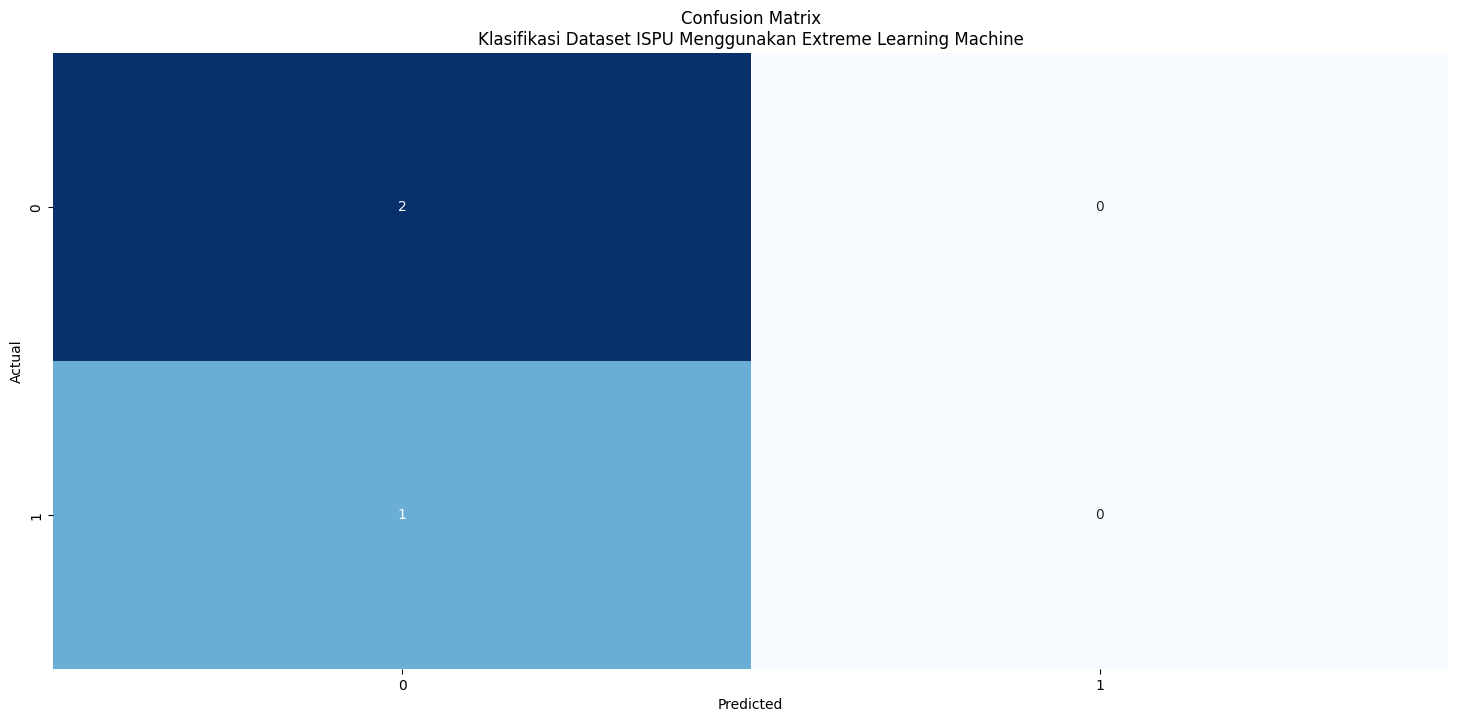

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Menghitung confusion matrix
cm = confusion_matrix(y_test, predict_test)

# Membuat plot confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix\nKlasifikasi Dataset ISPU Menggunakan Extreme Learning Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
# Menghitung akurasi
accuracy = accuracy_score(predict_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.6666666666666666


## Menampilkan Hasil Prediksi Klasifikasi Data Train

In [8]:
W_train, b_train, mape_train = elm_fit(X_train, y_train, 6)
predict_train = elm_predict(X_train, W_train, b_train, round_output=True)
result_train_df = pd.DataFrame({'Tanggal': data['Tanggal'].iloc[:X_train.shape[0]].reset_index(drop=True),
                                'Kategori': y_train,
                                'Hasil Klasifikasi ELM': predict_train})
print(result_train_df)


     Tanggal  Kategori  Hasil Klasifikasi ELM
0 2017-01-01       1.0                      1
1 2017-01-02       1.0                      1
2 2017-01-03       1.0                      1
3 2017-01-04       1.0                      1
4 2017-01-05       1.0                      1
5 2017-01-06       1.0                      1
6 2017-01-07       1.0                      1


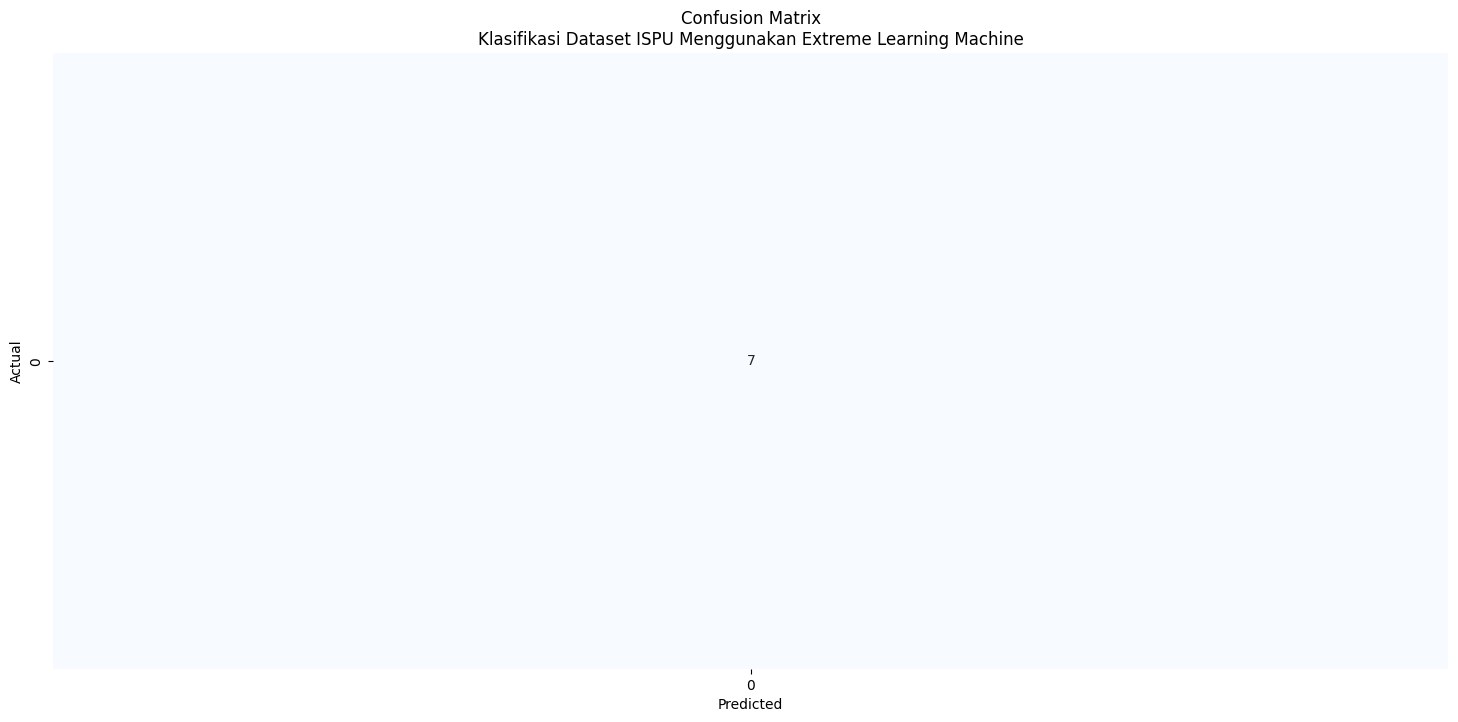

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Menghitung confusion matrix
cm = confusion_matrix(y_train, predict_train)

# Membuat plot confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix\nKlasifikasi Dataset ISPU Menggunakan Extreme Learning Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Menghitung akurasi
accuracy = accuracy_score(predict_train, y_train)

print('Accuracy:', accuracy)

Accuracy: 1.0


## Menyimpan Hasil Klasifikasi Kedalam Excel

In [11]:
result_df.to_excel('D:\Data\Kuliah\TA\Projek-TA\DATA\Classification\Klasifikasi_DKI1.xlsx', index=False)

In [12]:
data = pd.read_excel ("D:\Data\Kuliah\TA\Projek-TA\DATA\Classification\Klasifikasi_DKI1.xlsx")

# Membuat dictionary untuk pemetaan nilai
mapping = {1: 'BAIK', 2: 'SEDANG', 3: ' TIDAK SEHAT', 4: 'SANGAT TIDAK SEHAT', 5: 'BERBAHAYA'}

# Mengganti nilai menggunakan replace() dengan dictionary mapping
data['Kategori'] = data['Kategori'].replace(mapping)
data['Hasil Klasifikasi ELM'] = data['Hasil Klasifikasi ELM'].replace(mapping)
# Menampilkan data setelah perubahan
print(data)

     Tanggal Kategori Hasil Klasifikasi ELM
0 2017-01-08   SEDANG                  BAIK
1 2017-01-09     BAIK                  BAIK
2 2017-01-10     BAIK                  BAIK


In [13]:
'''
import matplotlib.pyplot as plt

# Mengurutkan DataFrame berdasarkan tanggal
result_df = result_df.sort_values('Tanggal')

# Mengatur posisi x untuk line chart
x_pos = range(len(result_df))

# Membuat figure dan axes dengan ukuran figur 8x6 inci
fig, ax = plt.subplots(figsize=(18, 6))

# Menampilkan line chart untuk hasil prediksi
ax.plot(x_pos, result_df['Hasil Klasifikasi ELM'], label='Hasil Klasifikasi ELM', marker='o')
ax.plot(x_pos, result_df['Kategori'], label='True', marker='x')

# Mengatur label pada sumbu x
ax.set_xticks(x_pos)
ax.set_xticklabels(result_df['Tanggal'], rotation=90)

# Menampilkan legenda
ax.legend()

# Menampilkan chart
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Mengurutkan DataFrame berdasarkan tanggal\nresult_df = result_df.sort_values('Tanggal')\n\n# Mengatur posisi x untuk line chart\nx_pos = range(len(result_df))\n\n# Membuat figure dan axes dengan ukuran figur 8x6 inci\nfig, ax = plt.subplots(figsize=(18, 6))\n\n# Menampilkan line chart untuk hasil prediksi\nax.plot(x_pos, result_df['Hasil Klasifikasi ELM'], label='Hasil Klasifikasi ELM', marker='o')\nax.plot(x_pos, result_df['Kategori'], label='True', marker='x')\n\n# Mengatur label pada sumbu x\nax.set_xticks(x_pos)\nax.set_xticklabels(result_df['Tanggal'], rotation=90)\n\n# Menampilkan legenda\nax.legend()\n\n# Menampilkan chart\nplt.show()\n"